In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_excel("../Case/IQVIA Data_ Value and Volume of Insulin Sales in India.xlsx", header=0, sheet_name=None)
all_data.keys()

dict_keys(['Value_Diabetes & Insulin', 'Volume_Insulin'])

In [4]:
data_value = all_data["Value_Diabetes & Insulin"]
data_volume = all_data["Volume_Insulin"]

In [5]:
data_volume

,State_NN,Product,Company,Therapy,Sub-therapy,Segment,MAT Feb'20,MAT Feb'21,MAT Feb'22,MAT Feb'23,MAT Feb'24
0,ANDHRA PRADESH,ACTRAPID,Novo Nordisk,Insulin,Short Acting,Human Insulin,190.8489,227.4035,240.7193,183.9154,176.3460
1,ANDHRA PRADESH,APIDRA,SANOFI*,Insulin,Short Acting,MI+NGI,4.5505,5.2515,6.4796,7.0916,8.7548
2,ANDHRA PRADESH,BASAGLAR,CIPLA,Insulin,Long Acting,MI+NGI,1.5306,3.6282,5.8137,5.1144,5.3106
3,ANDHRA PRADESH,BASALOG,BIOCON,Insulin,Long Acting,MI+NGI,37.7529,34.7276,37.9373,41.1529,39.9960
4,ANDHRA PRADESH,BASUGINE,LUPIN LIMITED,Insulin,Long Acting,MI+NGI,0.0840,0.8616,1.9059,2.1135,2.9427
...,...,...,...,...,...,...,...,...,...,...,...
1250,WEST BENGAL,XGLAR,ERIS LIFESCIENCES*,Insulin,Long Acting,MI+NGI,0.0000,0.0000,0.0000,0.1057,0.7907
1251,WEST BENGAL,XSULIN,ERIS LIFESCIENCES*,Insulin,Premix,Human Insulin,0.0000,0.0000,0.0000,3.1858,3.4667
1252,WEST BENGAL,XSULIN N,ERIS LIFESCIENCES*,Insulin,Long Acting,Human Insulin,0.0000,0.0000,0.0000,0.0152,0.0008
1253,WEST BENGAL,XSULIN R,ERIS LIFESCIENCES*,Insulin,Short Acting,Human Insulin,0.0000,0.0000,0.0000,0.4493,0.7879


volume

In [6]:
volume = {"Novo Nordisk": {"2020": [], "2021": [], "2022": [], "2023": [], "2024": []}, "Other": {"2020": [], "2021": [], "2022": [], "2023": [], "2024": []}}

In [7]:
for i,row in data_volume.iterrows():
    sales_key = "Novo Nordisk" if row["Company"] == "Novo Nordisk" else "Other"
    volume[sales_key]["2020"].append(row["MAT Feb'20"])
    volume[sales_key]["2021"].append(row["MAT Feb'21"])
    volume[sales_key]["2022"].append(row["MAT Feb'22"])
    volume[sales_key]["2023"].append(row["MAT Feb'23"])
    volume[sales_key]["2024"].append(row["MAT Feb'24"])

In [8]:
for k, v in volume.items():
    for k1, v1 in v.items():
        v[k1] = sum(v1)

In [9]:
volume

{'Novo Nordisk': {'2020': 24152.867900000005,
  '2021': 26163.47410000001,
  '2022': 25626.94820000001,
  '2023': 25127.864100000006,
  '2024': 24141.052900000017},
 'Other': {'2020': 15952.1327,
  '2021': 17031.12959999999,
  '2022': 17380.13839999999,
  '2023': 16006.697200000011,
  '2024': 15877.976100000013}}

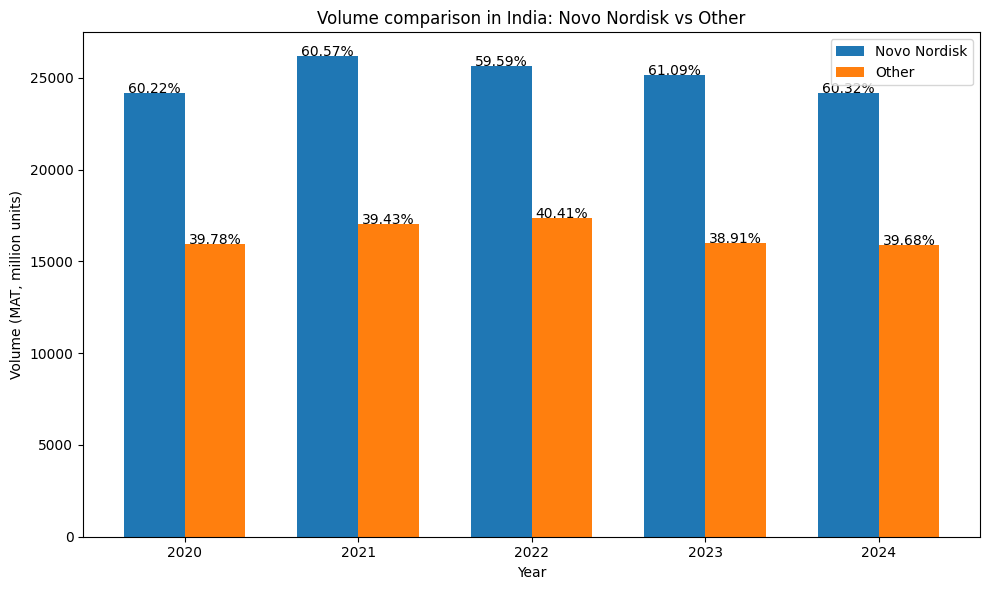

In [10]:
years = list(volume['Novo Nordisk'].keys())
novonordisk_values = list(volume['Novo Nordisk'].values())
other_values = list(volume['Other'].values())

# Calculate total volume
total_volume = sum(novonordisk_values) + sum(other_values)

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(years))
plt.bar(index, novonordisk_values, bar_width, label='Novo Nordisk')
plt.bar([i + bar_width for i in index], other_values, bar_width, label='Other')

# Annotate bars with percentage of total volume
for i, (novonordisk_val, other_val) in enumerate(zip(novonordisk_values, other_values)):
    total_val = novonordisk_val + other_val
    novonordisk_percent = (novonordisk_val / total_val) * 100
    other_percent = (other_val / total_val) * 100
    plt.text(i, novonordisk_val, f'{novonordisk_percent:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, other_val, f'{other_percent:.2f}%', ha='center', color='black')

plt.xlabel('Year')
plt.ylabel('Volume (MAT, million units)')
plt.title('Volume comparison in India: Novo Nordisk vs Other')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()

plt.tight_layout()
plt.show()

value/sales

In [130]:
sales = {"Novo Nordisk": {"2020": [], "2021": [], "2022": [], "2023": [], "2024": []}, "Other": {"2020": [], "2021": [], "2022": [], "2023": [], "2024": []}}

In [131]:
data_value

,State_NN,Product,Company,Therapy,Sub-therapy,Segment,MAT Feb'20,MAT Feb'21,MAT Feb'22,MAT Feb'23,MAT Feb'24
0,ANDHRA PRADESH,10 LI,APEX,MNIAD,MOAD,DPP4i+,0.00,9324.46,121982.28,357255.69,188496.00
1,ANDHRA PRADESH,10 LI M,APEX,MNIAD,MOAD,DPP4i+,0.00,0.00,255724.20,322329.49,203167.78
2,ANDHRA PRADESH,6F1C,SINSAN PHARMA.,MNIAD,MOAD,DPP4i+,0.00,0.00,0.00,1350.00,0.00
3,ANDHRA PRADESH,6F1C M,SINSAN PHARMA.,MNIAD,MOAD,DPP4i+,0.00,0.00,0.00,5893.73,0.00
4,ANDHRA PRADESH,ABVIDA,ABBOTT*,MNIAD,MOAD,DPP4i+,66748.22,1021579.90,1734008.43,1868487.57,1475295.67
...,...,...,...,...,...,...,...,...,...,...,...
35550,WEST BENGAL,ZUKER-MF,BIOCON,Conv. OAD,Conv. OAD,Conv. OAD,114907.32,45826.76,66424.04,71022.24,44405.76
35551,WEST BENGAL,ZUVOG,EMCURE*,Conv. OAD,Conv. OAD,Conv. OAD,3827812.04,3597067.63,3024824.71,2599659.49,2491580.79
35552,WEST BENGAL,ZUVOG TRIO,EMCURE*,Conv. OAD,Conv. OAD,Conv. OAD,2253520.07,2774938.38,3570495.38,4354798.40,4421252.24
35553,WEST BENGAL,ZUVOG-M,EMCURE*,Conv. OAD,Conv. OAD,Conv. OAD,3288476.58,3540635.41,2869210.90,2594270.24,1891182.27


In [132]:
for i,row in data_value.iterrows():
    sales_key = "Novo Nordisk" if row["Company"] == "Novo Nordisk" else "Other"
    if row["Therapy"] != "Insulin": continue
    sales[sales_key]["2020"].append(row["MAT Feb'20"])
    sales[sales_key]["2021"].append(row["MAT Feb'21"])
    sales[sales_key]["2022"].append(row["MAT Feb'22"])
    sales[sales_key]["2023"].append(row["MAT Feb'23"])
    sales[sales_key]["2024"].append(row["MAT Feb'24"])

In [133]:
for k, v in sales.items():
    for k1, v1 in v.items():
        v[k1] = sum(v1) / 12.03

In [134]:
sales

{'Novo Nordisk': {'2020': 1463917525.209476,
  '2021': 1588856074.8653371,
  '2022': 1696091302.6134667,
  '2023': 1847027575.0498743,
  '2024': 1921746634.4073157},
 'Other': {'2020': 1028916383.2867829,
  '2021': 1169032830.5802157,
  '2022': 1278950226.0133014,
  '2023': 1311723104.1870337,
  '2024': 1290779431.8354106}}

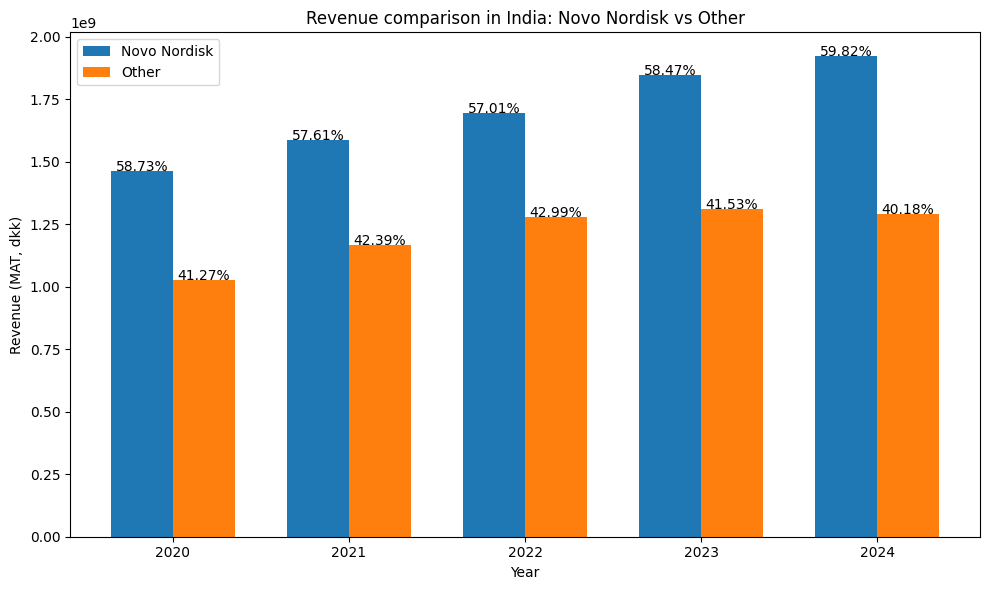

In [135]:
years = list(sales['Novo Nordisk'].keys())
novonordisk_values = list(sales['Novo Nordisk'].values())
other_values = list(sales['Other'].values())

# Calculate total volume
total_volume = sum(novonordisk_values) + sum(other_values)

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(years))
plt.bar(index, novonordisk_values, bar_width, label='Novo Nordisk')
plt.bar([i + bar_width for i in index], other_values, bar_width, label='Other')

# Annotate bars with percentage of total volume
for i, (novonordisk_val, other_val) in enumerate(zip(novonordisk_values, other_values)):
    total_val = novonordisk_val + other_val
    novonordisk_percent = (novonordisk_val / total_val) * 100
    other_percent = (other_val / total_val) * 100
    plt.text(i, novonordisk_val, f'{novonordisk_percent:.2f}%', ha='center', color='black')
    plt.text(i + bar_width, other_val, f'{other_percent:.2f}%', ha='center', color='black')

plt.xlabel('Year')
plt.ylabel('Revenue (MAT, dkk)')
plt.title('Revenue comparison in India: Novo Nordisk vs Other')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()

plt.tight_layout()
plt.show()

cost

In [136]:
novonordisk_sales_values = list(sales['Novo Nordisk'].values())
other_sales_values = list(sales['Other'].values())

novonordisk_volume_values = list(volume['Novo Nordisk'].values())
other_volume_values = list(volume['Other'].values())

novonordisk_cost = [rev / (vol * 1000000) for rev, vol in zip(novonordisk_sales_values, novonordisk_volume_values)]
other_cost = [rev / (vol * 1000000) for rev, vol in zip(other_sales_values, other_volume_values)]

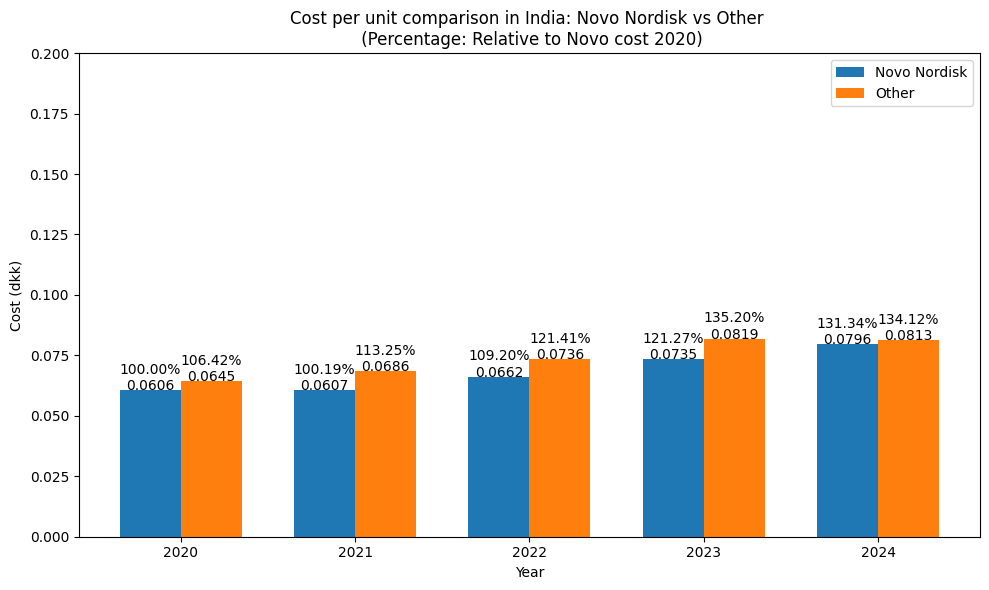

In [140]:
years = list(sales['Novo Nordisk'].keys())
novo_2020 = novonordisk_cost[0]

# Calculate total volume
total_volume = sum(novonordisk_cost) + sum(other_cost)

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(years))
plt.bar(index, novonordisk_cost, bar_width, label='Novo Nordisk')
plt.bar([i + bar_width for i in index], other_cost, bar_width, label='Other')
plt.ylim(0, 0.2)

# Annotate bars with percentage of total volume
for i, (novonordisk_val, other_val) in enumerate(zip(novonordisk_cost, other_cost)):
    novonordisk_percent = (novonordisk_val / novo_2020) * 100
    other_percent = (other_val / novo_2020) * 100
    plt.text(i, novonordisk_val, f'{novonordisk_percent:.2f}%\n{novonordisk_val:.4f}', ha='center', color='black')
    plt.text(i + bar_width, other_val, f'{other_percent:.2f}%\n{other_val:.4f}', ha='center', color='black')

plt.xlabel('Year')
plt.ylabel('Cost (dkk)')
plt.title('Cost per unit comparison in India: Novo Nordisk vs Other \n (Percentage: Relative to Novo cost 2020)')
plt.xticks([i + bar_width / 2 for i in index], years)
plt.legend()

plt.tight_layout()
plt.show()

type

In [128]:
import copy

yearly_dict = {"2020": [], "2021": [], "2022": [], "2023": [], "2024": []}
types_the = {
    "Novo Nordisk": {"Short Acting": copy.deepcopy(yearly_dict), "Long Acting": copy.deepcopy(yearly_dict), "Premix": copy.deepcopy(yearly_dict)}, 
    "Other": {"Short Acting": copy.deepcopy(yearly_dict), "Long Acting": copy.deepcopy(yearly_dict), "Premix": copy.deepcopy(yearly_dict)}
}

types_seg = {
    "Novo Nordisk": {"Human Insulin": copy.deepcopy(yearly_dict), "MI+NGI": copy.deepcopy(yearly_dict)},
    "Other": {"Human Insulin": copy.deepcopy(yearly_dict), "MI+NGI": copy.deepcopy(yearly_dict)}
}

types_the_cost = {
    "Novo Nordisk": {"Short Acting": copy.deepcopy(yearly_dict), "Long Acting": copy.deepcopy(yearly_dict), "Premix": copy.deepcopy(yearly_dict)}, 
    "Other": {"Short Acting": copy.deepcopy(yearly_dict), "Long Acting": copy.deepcopy(yearly_dict), "Premix": copy.deepcopy(yearly_dict)}
}

types_seg_cost = {
    "Novo Nordisk": {"Human Insulin": copy.deepcopy(yearly_dict), "MI+NGI": copy.deepcopy(yearly_dict)},
    "Other": {"Human Insulin": copy.deepcopy(yearly_dict), "MI+NGI": copy.deepcopy(yearly_dict)}
}

In [141]:
for i,row in data_value.iterrows():
    if row["Therapy"] != "Insulin": continue
    sales_key = "Novo Nordisk" if row["Company"] == "Novo Nordisk" else "Other"
    types_the_cost[sales_key][row["Sub-therapy"]]["2020"].append(row["MAT Feb'20"])
    types_the_cost[sales_key][row["Sub-therapy"]]["2021"].append(row["MAT Feb'21"])
    types_the_cost[sales_key][row["Sub-therapy"]]["2022"].append(row["MAT Feb'22"])
    types_the_cost[sales_key][row["Sub-therapy"]]["2023"].append(row["MAT Feb'23"])
    types_the_cost[sales_key][row["Sub-therapy"]]["2024"].append(row["MAT Feb'24"])

for i,row in data_value.iterrows():
    if row["Therapy"] != "Insulin": continue
    sales_key = "Novo Nordisk" if row["Company"] == "Novo Nordisk" else "Other"
    types_seg_cost[sales_key][row["Segment"]]["2020"].append(row["MAT Feb'20"])
    types_seg_cost[sales_key][row["Segment"]]["2021"].append(row["MAT Feb'21"])
    types_seg_cost[sales_key][row["Segment"]]["2022"].append(row["MAT Feb'22"])
    types_seg_cost[sales_key][row["Segment"]]["2023"].append(row["MAT Feb'23"])
    types_seg_cost[sales_key][row["Segment"]]["2024"].append(row["MAT Feb'24"])

for i,row in data_volume.iterrows():
    sales_key = "Novo Nordisk" if row["Company"] == "Novo Nordisk" else "Other"
    types_the[sales_key][row["Sub-therapy"]]["2020"].append(row["MAT Feb'20"])
    types_the[sales_key][row["Sub-therapy"]]["2021"].append(row["MAT Feb'21"])
    types_the[sales_key][row["Sub-therapy"]]["2022"].append(row["MAT Feb'22"])
    types_the[sales_key][row["Sub-therapy"]]["2023"].append(row["MAT Feb'23"])
    types_the[sales_key][row["Sub-therapy"]]["2024"].append(row["MAT Feb'24"])

for i,row in data_volume.iterrows():
    sales_key = "Novo Nordisk" if row["Company"] == "Novo Nordisk" else "Other"
    types_seg[sales_key][row["Segment"]]["2020"].append(row["MAT Feb'20"])
    types_seg[sales_key][row["Segment"]]["2021"].append(row["MAT Feb'21"])
    types_seg[sales_key][row["Segment"]]["2022"].append(row["MAT Feb'22"])
    types_seg[sales_key][row["Segment"]]["2023"].append(row["MAT Feb'23"])
    types_seg[sales_key][row["Segment"]]["2024"].append(row["MAT Feb'24"])

In [142]:
for k1, v1 in types_the.items():
    for k2, v2 in v1.items():
        for k3, v3 in v2.items():
            v2[k3] = sum(v3)

for k1, v1 in types_seg.items():
    for k2, v2 in v1.items():
        for k3, v3 in v2.items():
            v2[k3] = sum(v3)

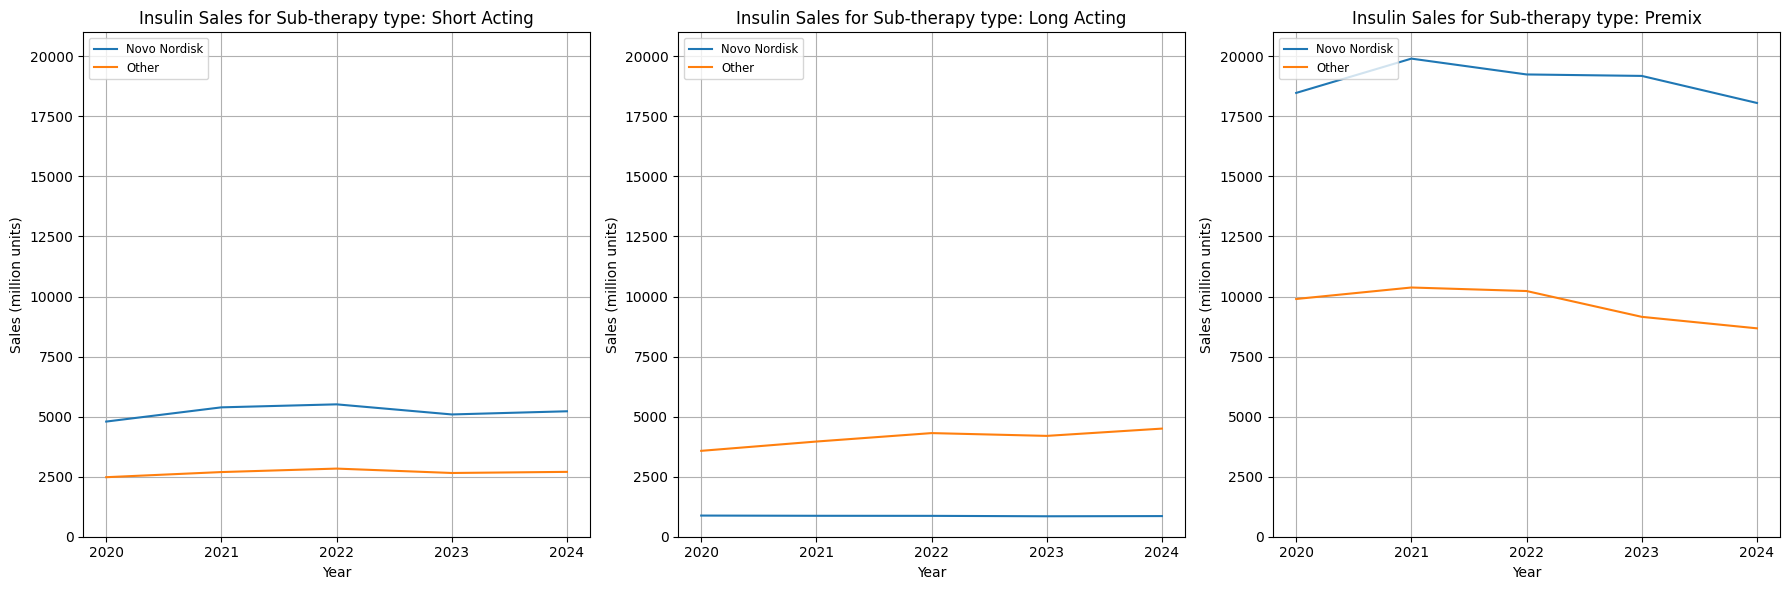

In [143]:
years = ['2020', '2021', '2022', '2023', '2024']

# Define the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Iterate through each company and its data
for company, company_data in types_the.items():
    # Plot the data for each insulin type
    for ax, (insulin, insulin_sales) in zip(axs, company_data.items()):
        ax.plot(years, list(insulin_sales.values()), label=f'{company}')
        ax.set_title(f'Insulin Sales for Sub-therapy type: {insulin}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Sales (million units)')
        ax.set_xticks(years)
        ax.set_ylim(0, 21000)
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

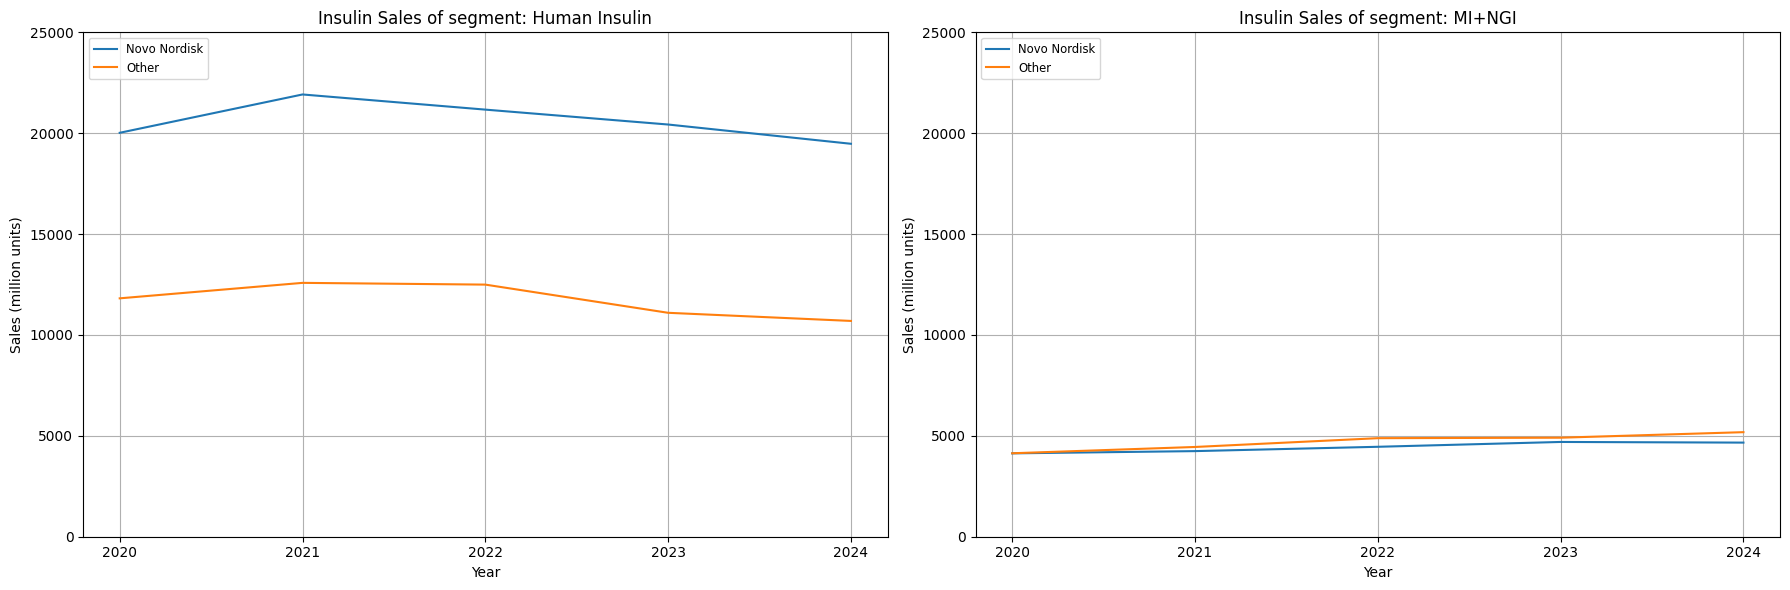

In [144]:
years = ['2020', '2021', '2022', '2023', '2024']

# Define the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Iterate through each company and its data
for company, company_data in types_seg.items():
    # Plot the data for each insulin type
    for ax, (insulin, insulin_sales) in zip(axs, company_data.items()):
        ax.plot(years, list(insulin_sales.values()), label=f'{company}')
        ax.set_title(f'Insulin Sales of segment: {insulin}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Sales (million units)')
        ax.set_xticks(years)
        ax.set_ylim(0, 25000)
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

cost relative to type

In [ ]:
years = ['2020', '2021', '2022', '2023', '2024']

# Define the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Iterate through each company and its data
for company, company_data in types_the.items():
    # Plot the data for each insulin type
    for ax, (insulin, insulin_sales) in zip(axs, company_data.items()):
        ax.plot(years, list(insulin_sales.values()), label=f'{company}')
        ax.set_title(f'Insulin Sales of insulin for {insulin}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Sales (million units)')
        ax.set_xticks(years)
        ax.set_ylim(0, 21000)
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()